# Tabular Playground Series - July 2022

In [29]:
# Version: Playground_3
# Score: #####786 (68.05%)
# Clusters: #####6 (elbow)
# Method: #####k-means

# Best
# Version: Playground_2
# Score: 786 of 1155 (68.05%)
# Clusters: 6 (elbow)
# Method: k-means

References:

https://realpython.com/k-means-clustering-python/#:~:text=The%20k%2Dmeans%20clustering%20method,the%20oldest%20and%20most%20approachable
https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad


In [30]:
import os
import numpy as np
import pandas as pd
#from datetime import datetime

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

# 1. Loading the data

Load the dataset.

In [31]:
# Set the working directory
os.chdir("C:\\_Kaggle\\Playground - Jul 2022\\data")

In [32]:
# Load the dataset
data_df = pd.read_csv('data.csv', sep=',', encoding='UTF-8', index_col='id')

In [33]:
# Verifing
print(f'Dimensions {data_df.shape}')
data_df.head()

Dimensions (98000, 29)


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


# 2. Checking the dataset 

First checks of the loaded data to see the data types, missing values and outliers. The purpose is to have an idea of the data in order to be able to define what kind of data transformation may be needed.

In [34]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

In [35]:
# There are no missing values 

# Let's validade the data types:
data_df.nunique()

f_00    98000
f_01    98000
f_02    98000
f_03    98000
f_04    98000
f_05    98000
f_06    98000
f_07       32
f_08       29
f_09       45
f_10       37
f_11       29
f_12       39
f_13       30
f_14    98000
f_15    98000
f_16    98000
f_17    98000
f_18    98000
f_19    98000
f_20    98000
f_21    98000
f_22    98000
f_23    98000
f_24    98000
f_25    98000
f_26    98000
f_27    98000
f_28    98000
dtype: int64

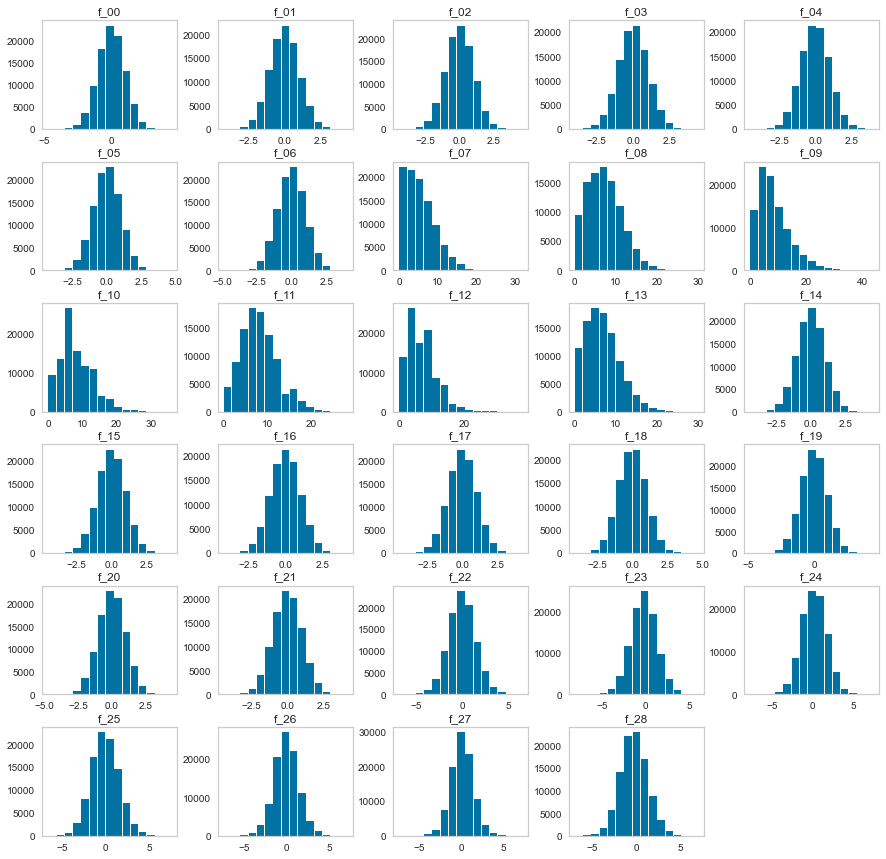

In [36]:
# Besides 'id', there are other features with integer values, from 'f_07' to 'f_13'.

# Let's see the value distribution:
data_df.hist(
    bins=15,
    figsize=(15, 15),
    grid = False,
    rwidth = 0.9,
)
plt.show()

In [37]:
# The values of the integter features are not simetrical. They are displaced to the left.

<AxesSubplot:>

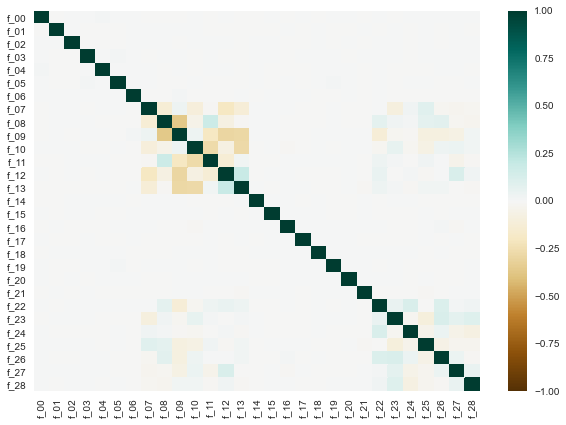

In [38]:
# Let's check the correlation among the features
plt.figure(figsize=(10, 7))
sns.heatmap(data_df[data_df.columns[data_df.columns!='id']].corr(), vmin=-1, vmax=1, cmap='BrBG')

In [39]:
# As we can see, there is no relationship between the variables. Perhaps, a barely correlation among a group of features (f_07 to f_13).
# Notice: these features the ones with the integer values.

# 3. Standardization

In [40]:
# Let's see whether the features are standardized
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


In [41]:
# Integer features (f_07 to f_13) are not standardized. That's what we previously saw.
# Last features (f_22 to f_28) are not standardized neither. This could not be predicted by the graphics.

# So, these features must be standardized.
features_to_std = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']

scaler = StandardScaler()
data_df[features_to_std] = scaler.fit_transform(data_df[features_to_std])

In [42]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,1.219666e-03,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,5.579518e-03,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-1.041828e-03,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-7.001808e-04,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-3.521904e-03,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-1.611833e-03,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-3.041598e-03,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,-2.443692e-16,1.000005,-1.502217,-0.689610,-0.147872,0.664735,7.165591
f_08,98000.0,-3.856326e-18,1.000005,-1.628740,-0.665425,-0.183767,0.538719,5.596125
f_09,98000.0,1.859057e-17,1.000005,-1.387522,-0.710117,-0.202064,0.475341,6.063931


In [16]:
#Now we have all features standardized

# 4. Get the number of clusters

## 4.1 Elbow method

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

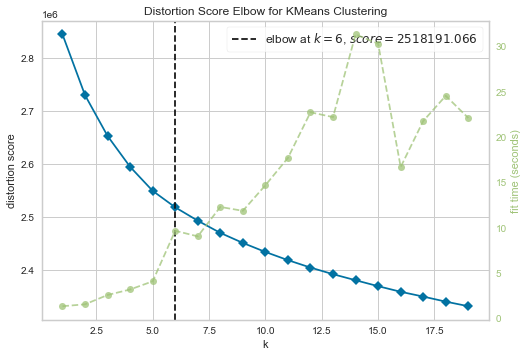

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
X = data_df.copy()
#X.drop('id', axis=1, inplace=True)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20), metric='distortion', timings=True)
visualizer.fit(X)
visualizer.show()

In [19]:
# Number of clusters: k=6

## 4.2 Silhouette coefficient

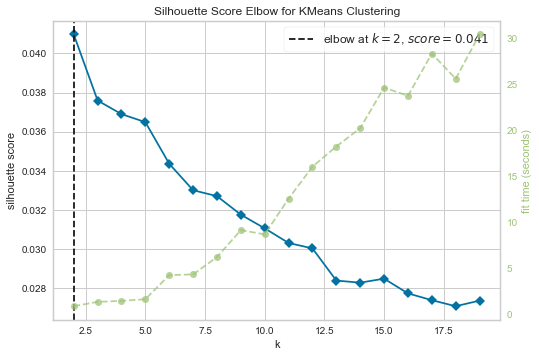

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
# Silhouette coefficient
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

In [ ]:
# Number of clusters: k=

## 4.3 Calinski-Harabasz index

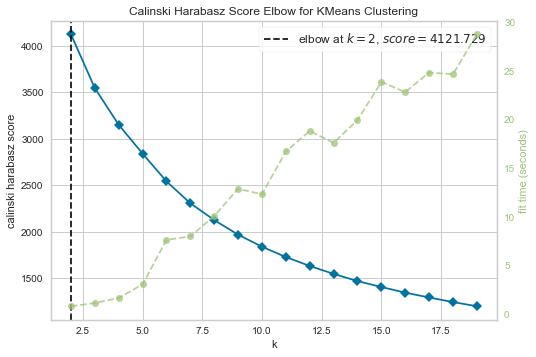

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [22]:
# Calinski Harabasz Score for K means
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show()

In [ ]:
# Number of clusters: k=

## 4.4 Davies-Bouldin index

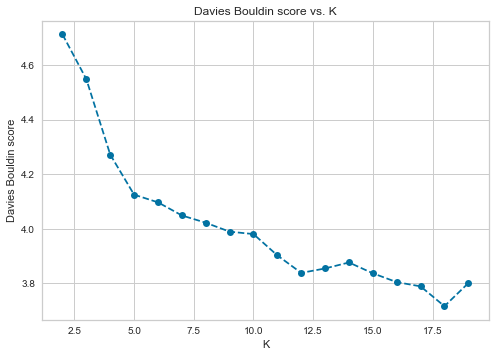

In [24]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(data)
    score = davies_bouldin_score(data, model)
    return score

scores = []
centers = list(range(2,20))

for center in centers:
    scores.append(get_kmeans_score(X, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [25]:
# Number of clusters: k=

## 4.5 Gap Statistic

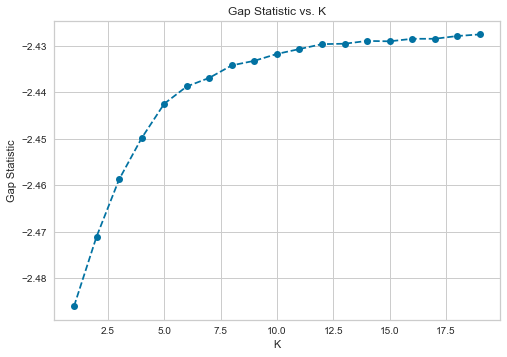

In [26]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(k)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(k)
        km.fit(data)
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(X, nrefs=5, maxClusters=20)

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

In [27]:
# Number of clusters: k=

## 4.6 Bayesian information criterion

In [28]:
# BIC for GMM
from sklearn.mixture import GaussianMixture

n_components = range(1, 20)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(X)
        score.append((cov,n_comp,gmm.bic(X)))
score

[('spherical', 1, 8068315.0166286435),
 ('spherical', 2, 8032381.428063436),
 ('spherical', 3, 8019915.639530935),
 ('spherical', 4, 8011961.300329801),
 ('spherical', 5, 8001755.74767587),
 ('spherical', 6, 7996897.430121572),
 ('spherical', 7, 7993344.5795222),
 ('spherical', 8, 7989362.252884598),
 ('spherical', 9, 7987023.4184220815),
 ('spherical', 10, 7983526.673826615),
 ('spherical', 11, 7980791.002208279),
 ('spherical', 12, 7980380.707202784),
 ('spherical', 13, 7979311.824682714),
 ('spherical', 14, 7976156.72772961),
 ('spherical', 15, 7975910.204796225),
 ('spherical', 16, 7975708.947770538),
 ('spherical', 17, 7971514.333241828),
 ('spherical', 18, 7971712.340479196),
 ('spherical', 19, 7969327.46768457),
 ('tied', 1, 7979308.496243923),
 ('tied', 2, 7952884.485672347),
 ('tied', 3, 7949537.934941937),
 ('tied', 4, 7938189.109189836),
 ('tied', 5, 7930610.997873997),
 ('tied', 6, 7923756.446887577),
 ('tied', 7, 7921557.181951415),
 ('tied', 8, 7911139.9440142745),
 ('tie

In [ ]:
# Number of clusters: k=

# 5. Generate clusters

In [59]:
model = KMeans(
    init="random",
    n_clusters=7,
    n_init=10,
    max_iter=300,
    random_state=101
)

In [60]:
prediction = model.fit_predict(data_df)

In [61]:
# The lowest SSE value
model.inertia_

2492878.82714948

In [62]:
# The number of iterations required to converge
model.n_iter_

77

# 6. Make output file

In [63]:
# Load the dataset
submission = pd.read_csv('sample_submission.csv', sep=',', encoding='UTF-8', index_col='Id')
submission['Predicted'] = prediction
submission.to_csv('submission.csv')

In [64]:
submission

,Predicted
Id,
0,4
1,0
2,1
3,3
4,0
...,...
97995,0
97996,0
97997,2
